In [1]:
from tifffile import imread
import os
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [2]:
um_per_pixel = 0.117
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/b_condensate_FOV/"
os.chdir(folder_save)

ilastik_output = imread(
    "20221031-FL_noTR_noDex_20ms_0hr_Replicate3_FOV-8-condensates_AveProj_Simple Segmentation.tif"
)
img = imread("20221031-FL_noTR_noDex_20ms_0hr_Replicate3_FOV-8-condensates_AveProj.tif")

plow = 0.5  # imshow intensity percentile
phigh = 90
line_color = "grey" # #00274C
scalebar_color = "black"

scalebar_length_um = 5
scalebar_length_pxl = scalebar_length_um / um_per_pixel

# Overview Plot

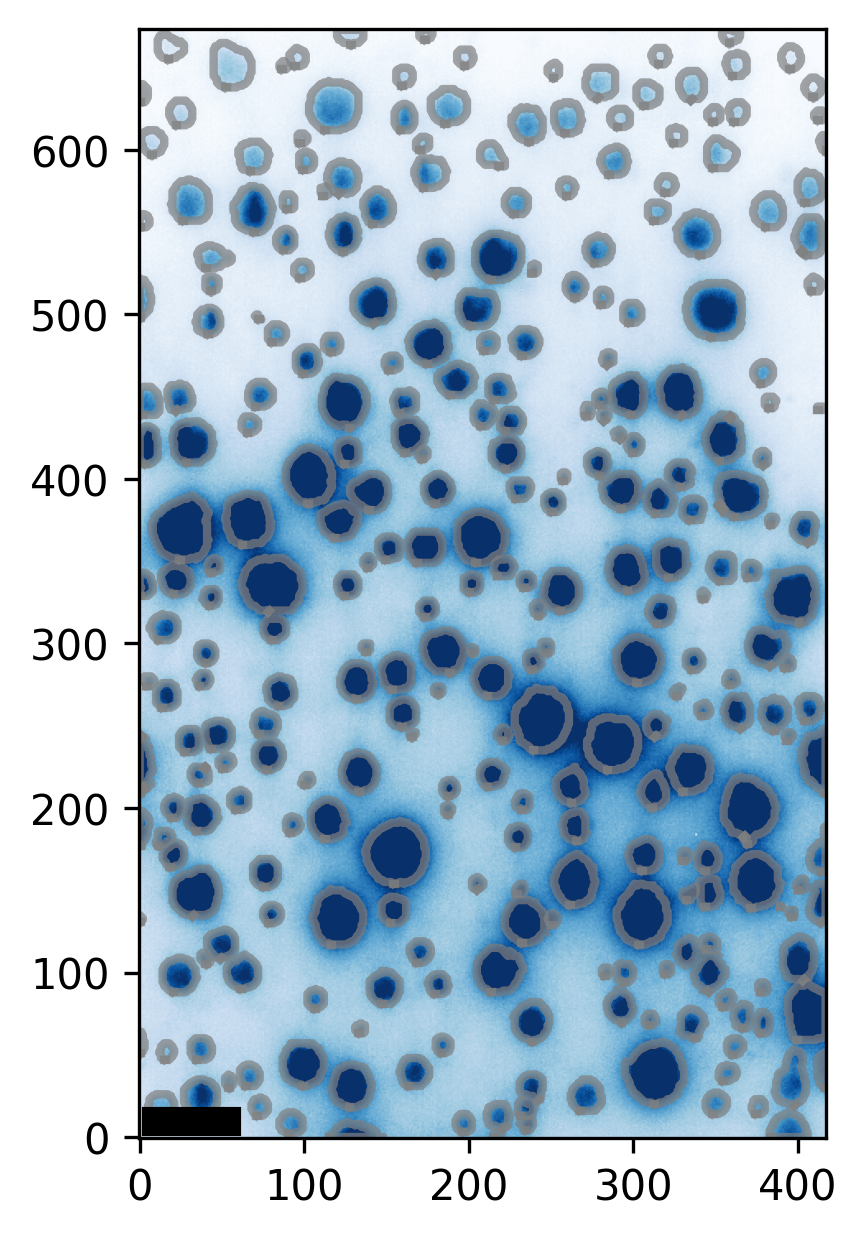

In [3]:
# full size: 418x674
zoom_in_x = (0, 418)
zoom_in_y = (0, 674)
scale_bar_offset = 10

# Cropping
ilastik_output = ilastik_output[
    zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]
]
img = img[zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]]

mask_all_condensates = 2 - ilastik_output  # background label=2, condensate label=1
# find contours coordinates in binary edge image. contours here is a list of np.arrays containing all coordinates of each individual edge/contour.
contours, _ = cv2.findContours(
    mask_all_condensates, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)


plt.figure(dpi=300)
# Contrast stretching
vmin, vmax = np.percentile(img, (plow, phigh))
plt.imshow(img, cmap="Blues", vmin=vmin, vmax=vmax)
for cnt in contours:
    x = cnt[:, 0][:, 0]
    y = cnt[:, 0][:, 1]
    plt.plot(x, y, "-", color=line_color, linewidth=2, alpha=0.7)
    # still the last closing line will be missing, get it below
    xlast = [x[-1], x[0]]
    ylast = [y[-1], y[0]]
    plt.plot(xlast, ylast, "-", color=line_color, linewidth=2, alpha=0.7)
plt.xlim(0, img.shape[0])
plt.ylim(0, img.shape[1])
plt.plot([scale_bar_offset, scale_bar_offset + scalebar_length_pxl], [scale_bar_offset, scale_bar_offset], "-", color=scalebar_color, lw=7)
plt.axis("scaled")
plt.show()

# Zoom in

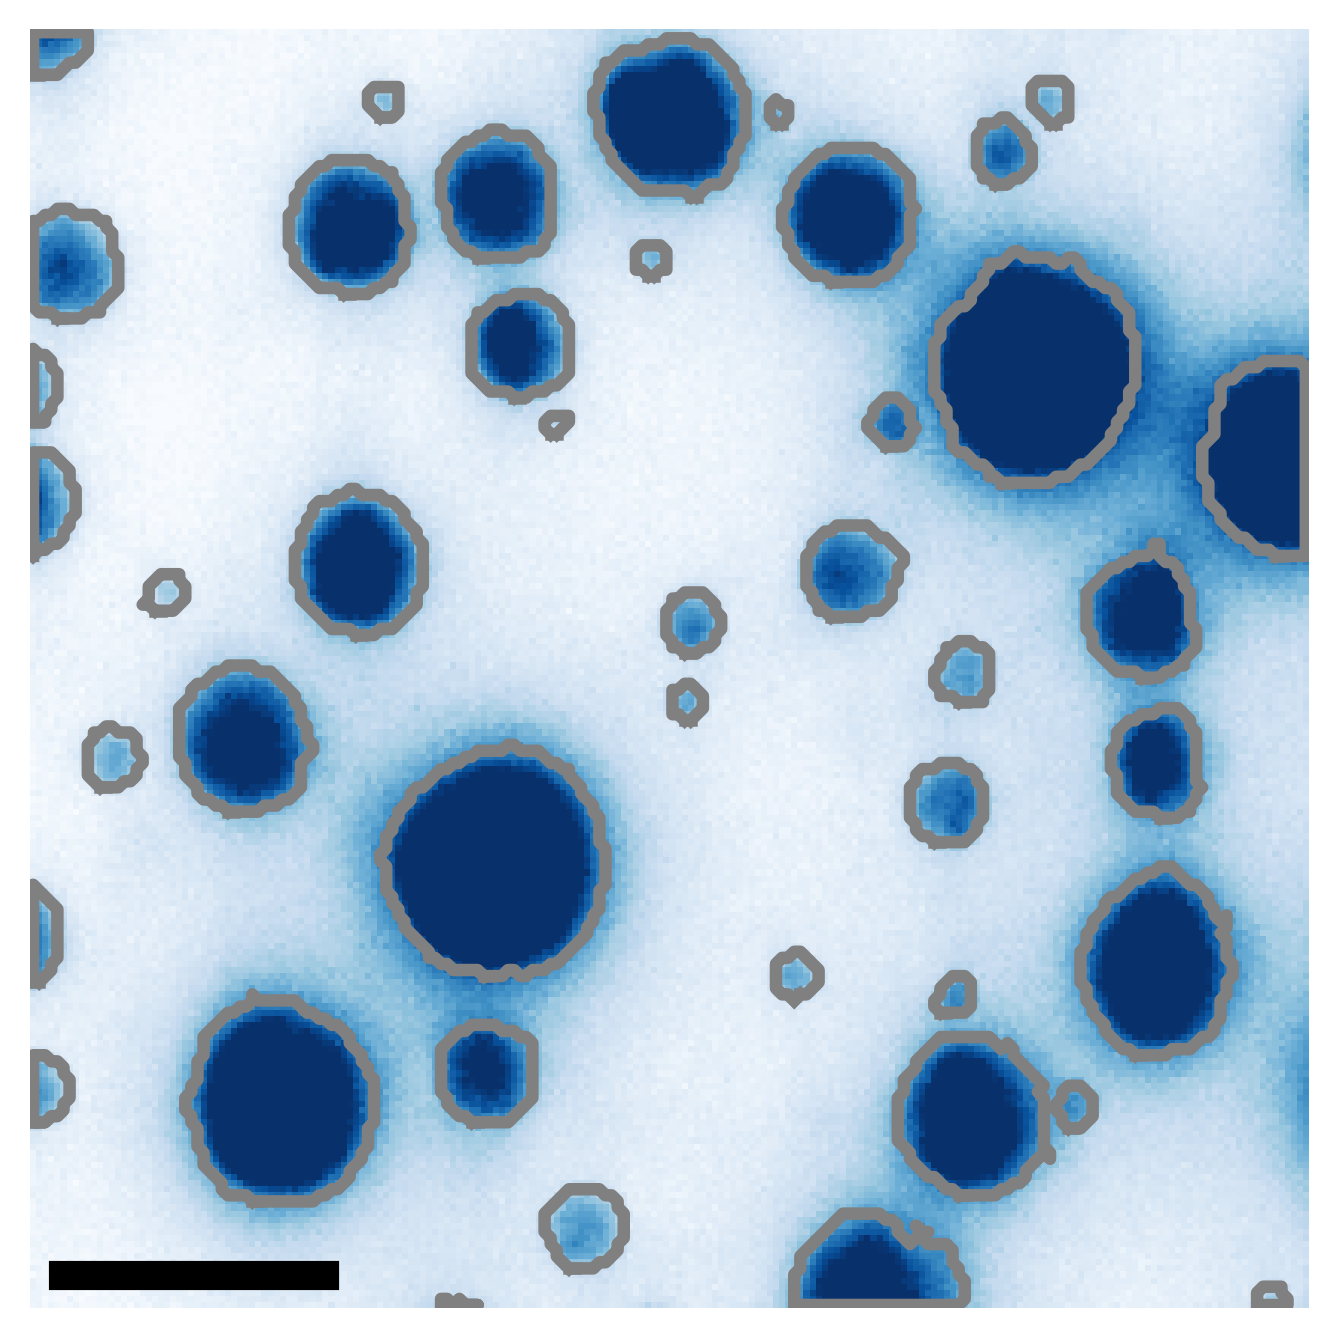

In [4]:
# full size: 418x674
zoom_in_x = (80, 290)
zoom_in_y = (100, 310)
saving_switch = True
plot_axis = False
scale_bar_offset = 5

# Cropping
ilastik_output_toplot = ilastik_output[
    zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]
]
img_toplot = img[zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]]

mask_all_condensates = 2 - ilastik_output_toplot  # background label=2, condensate label=1

# find contours coordinates in binary edge image. contours here is a list of np.arrays containing all coordinates of each individual edge/contour.
contours, _ = cv2.findContours(
    mask_all_condensates, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)

plt.figure(dpi=300)
# Contrast stretching
vmin, vmax = np.percentile(img_toplot, (plow, phigh))
plt.imshow(img_toplot, cmap="Blues", vmin=vmin, vmax=vmax)
for cnt in contours:
    x = cnt[:, 0][:, 0]
    y = cnt[:, 0][:, 1]
    plt.plot(x, y, "-", color=line_color, linewidth=3)
    # still the last closing line will be missing, get it below
    xlast = [x[-1], x[0]]
    ylast = [y[-1], y[0]]
    plt.plot(xlast, ylast, "-", color=line_color, linewidth=3)

plt.xlim(0, img_toplot.shape[0])
plt.ylim(0, img_toplot.shape[1])
plt.tight_layout()
plt.axis("scaled")
if not plot_axis:
    plt.axis("off")


# plot scale bar
plt.plot(
    [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
    [scale_bar_offset, scale_bar_offset],
    "-",
    color=scalebar_color,
    lw=7,
)

if saving_switch:
    i = 0
    fname_save = ("Fig1_b_condensate_FOV-" 
                  + "x_"
                  + str(zoom_in_x[0]) 
                  + "_"
                  + str(zoom_in_x[1]) 
                  + "_y_"
                  + str(zoom_in_y[0]) 
                  + "_"
                  + str(zoom_in_y[1]) 
                  + ".png")
    while exists(fname_save):
        fname_save = fname_save[:-4] + "-" + str(i) + ".png"
        i += 1

    plt.savefig(fname_save, format="png", bbox_inches="tight")
    
plt.show()